In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score


import numpy as np 
import pandas as pd 


In [3]:
# Load the data
df = pd.read_csv('synthetic_personal_finance_dataset.csv')

# Display basic information
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32424 entries, 0 to 32423
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  32424 non-null  object 
 1   age                      32424 non-null  int64  
 2   gender                   32424 non-null  object 
 3   education_level          32424 non-null  object 
 4   employment_status        32424 non-null  object 
 5   job_title                32424 non-null  object 
 6   monthly_income_usd       32424 non-null  float64
 7   monthly_expenses_usd     32424 non-null  float64
 8   savings_usd              32424 non-null  float64
 9   has_loan                 32424 non-null  object 
 10  loan_type                12995 non-null  object 
 11  loan_amount_usd          32424 non-null  float64
 12  loan_term_months         32424 non-null  int64  
 13  monthly_emi_usd          32424 non-null  float64
 14  loan_int

In [4]:
print(df.isnull().sum())

user_id                        0
age                            0
gender                         0
education_level                0
employment_status              0
job_title                      0
monthly_income_usd             0
monthly_expenses_usd           0
savings_usd                    0
has_loan                       0
loan_type                  19429
loan_amount_usd                0
loan_term_months               0
monthly_emi_usd                0
loan_interest_rate_pct         0
debt_to_income_ratio           0
credit_score                   0
savings_to_income_ratio        0
region                         0
record_date                    0
dtype: int64


In [5]:
print(df.describe())

                age  monthly_income_usd  monthly_expenses_usd   savings_usd  \
count  32424.000000        32424.000000          32424.000000  3.242400e+04   
mean      43.415865         4027.863185           2419.444709  2.437520e+05   
std       14.978246         1916.773353           1388.893084  1.915772e+05   
min       18.000000          500.000000            150.010000  6.359600e+02   
25%       30.000000         2657.795000           1397.497500  8.629155e+04   
50%       43.000000         3997.740000           2219.575000  2.017003e+05   
75%       56.000000         5351.607500           3254.037500  3.589662e+05   
max       69.000000        12404.050000          10082.710000  1.237774e+06   

       loan_amount_usd  loan_term_months  monthly_emi_usd  \
count     32424.000000      32424.000000     32424.000000   
mean     100114.735992         58.500000      3092.992339   
std      152536.588635        104.865373      6478.939776   
min           0.000000          0.000000    

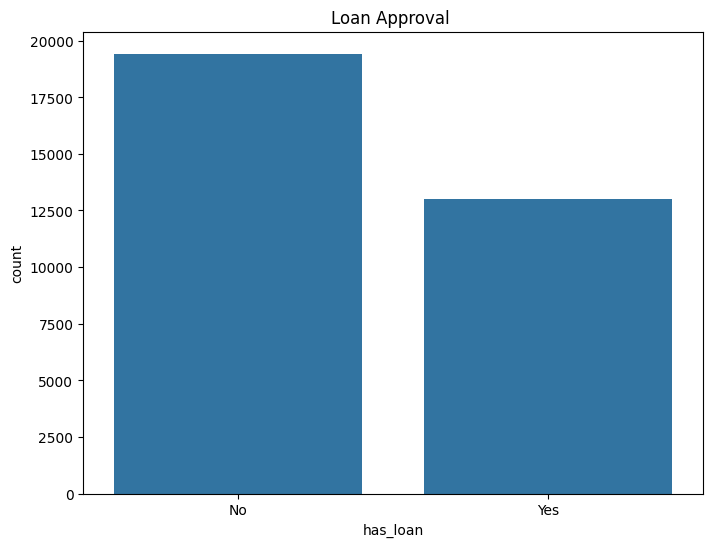

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='has_loan', data=df)
plt.title('Loan Approval ')
plt.show()

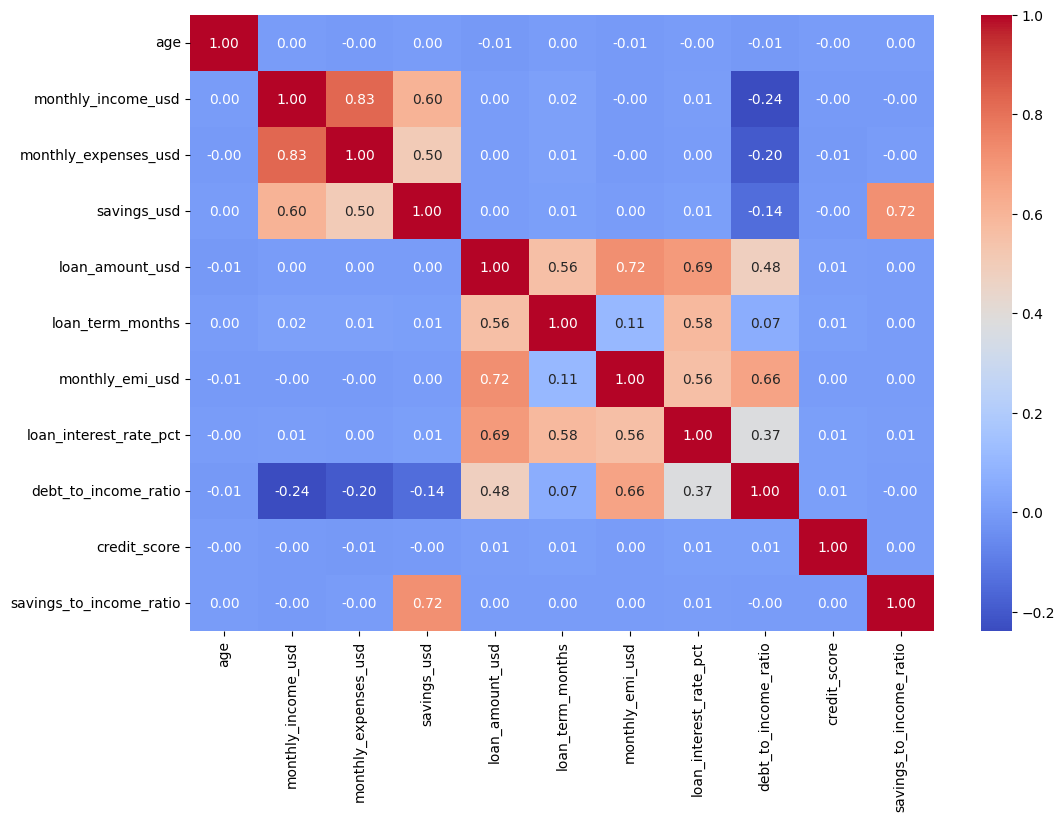

In [9]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [12]:

df['loan_type'] = df['loan_type'].fillna('None')
categorical_cols = ['gender', 'education_level', 'employment_status', 'region', 'loan_type', 'has_loan']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
numerical_cols = ['age', 'monthly_income_usd', 'monthly_expenses_usd', 'savings_usd', 
                  'loan_amount_usd', 'loan_term_months', 'monthly_emi_usd', 
                  'loan_interest_rate_pct', 'debt_to_income_ratio', 'credit_score', 
                  'savings_to_income_ratio']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [15]:
df['savings_usd'].head()

0    0.494699
1    0.257358
2    0.151535
3    0.374144
4    0.619707
Name: savings_usd, dtype: float64

In [16]:

df['savings_usd'] = np.log1p(df['savings_usd'])


In [17]:
df['savings_usd'].head()

0    0.401925
1    0.229012
2    0.141096
3    0.317831
4    0.482245
Name: savings_usd, dtype: float64

In [19]:
from sklearn.impute import KNNImputer 
temp_df = df[numerical_cols].copy()
imputer = KNNImputer(n_neighbors=5)
temp_df_imputed = imputer.fit_transform(temp_df)
df[numerical_cols] = pd.DataFrame(temp_df_imputed, columns=numerical_cols, index=df.index)

In [20]:
df.head()

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
0,U00001,0.840174,0,1,1,Salesperson,-0.258863,-0.890546,0.401925,0,4,-0.656343,-0.557867,-0.477399,-0.698454,-0.317626,-0.913468,1.274706,4,2024-01-09
1,U00002,-1.630114,0,4,0,Salesperson,-0.258842,-0.037048,0.229012,1,2,0.302939,-0.214564,0.287167,0.708730,0.054525,-0.202869,0.390899,3,2022-02-13
2,U00003,-1.563349,0,2,0,Teacher,-0.640865,-1.019198,0.141096,0,4,-0.656343,-0.557867,-0.477399,-0.698454,-0.317626,1.124001,0.639908,0,2022-05-12
3,U00004,-1.229526,1,4,0,Manager,0.974057,1.454904,0.317831,1,0,-0.045055,-0.328998,0.283010,1.827721,-0.094335,-0.718525,-0.257928,2,2023-10-02
4,U00005,0.639880,0,4,0,Student,0.574447,1.237094,0.482245,0,4,-0.656343,-0.557867,-0.477399,-0.698454,-0.317626,-0.372658,0.860860,0,2021-08-07


In [21]:
X = df.drop(columns=['user_id', 'job_title', 'record_date'])
y = df['has_loan']

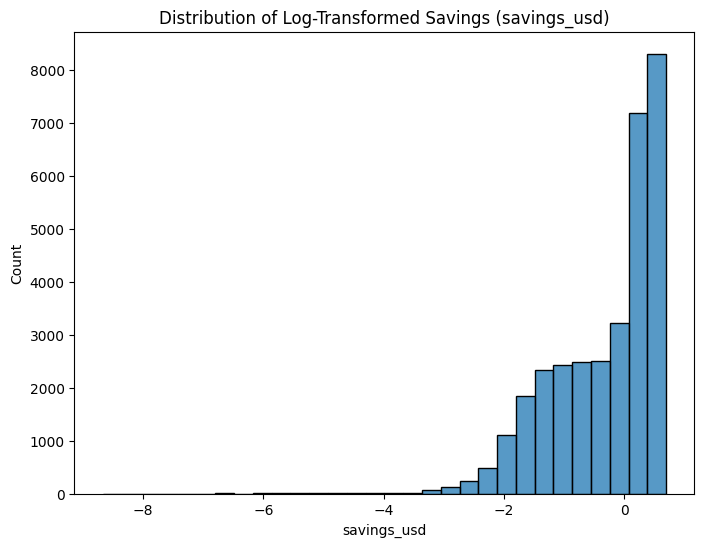

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(df['savings_usd'], bins=30)
plt.title('Distribution of Log-Transformed Savings (savings_usd)')
plt.show()

In [23]:
df['net_savings'] = df['monthly_income_usd'] - df['monthly_expenses_usd']

In [24]:
X = df.drop(columns=['user_id', 'job_title', 'record_date', 'has_loan'])
y = df['has_loan']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [26]:

results = {}

for name, model in models.items():

    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Сбор метрик
    results[name] = {
        'CV ROC-AUC': np.mean(cv_scores),
        'CV Std': np.std(cv_scores),
        'Test ROC-AUC': roc_auc_score(y_test, y_proba),
        'Precision (Class 0)': classification_report(y_test, y_pred, output_dict=True)['0']['precision'],
        'Recall (Class 0)': classification_report(y_test, y_pred, output_dict=True)['0']['recall'],
        'Precision (Class 1)': classification_report(y_test, y_pred, output_dict=True)['1']['precision'],
        'Recall (Class 1)': classification_report(y_test, y_pred, output_dict=True)['1']['recall'],
        'F1-Score (Class 1)': classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']
    }


results_df = pd.DataFrame(results).T


results_df = results_df.round(3)


styled = results_df.style.background_gradient(cmap='Blues', subset=['CV ROC-AUC', 'Test ROC-AUC']) \
                        .background_gradient(cmap='Greens', subset=['F1-Score (Class 1)']) \
                        .format(precision=3)


styled

,CV ROC-AUC,CV Std,Test ROC-AUC,Precision (Class 0),Recall (Class 0),Precision (Class 1),Recall (Class 1),F1-Score (Class 1)
Logistic Regression,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000
Random Forest,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000
Gradient Boosting,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000


Такого не бывает нужно найти утечки данных


🔝 Топ-10 самых важных признаков по Random Forest:


,feature,importance
9,loan_term_months,0.2441
8,loan_amount_usd,0.1811
11,loan_interest_rate_pct,0.1798
12,debt_to_income_ratio,0.1615
7,loan_type,0.1302
10,monthly_emi_usd,0.1009
6,savings_usd,0.0022
4,monthly_income_usd,0.0000
5,monthly_expenses_usd,0.0000
16,net_savings,0.0000


C:\Users\user\AppData\Local\Temp\ipykernel_16572\840836629.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='importance', y='feature', palette='viridis')


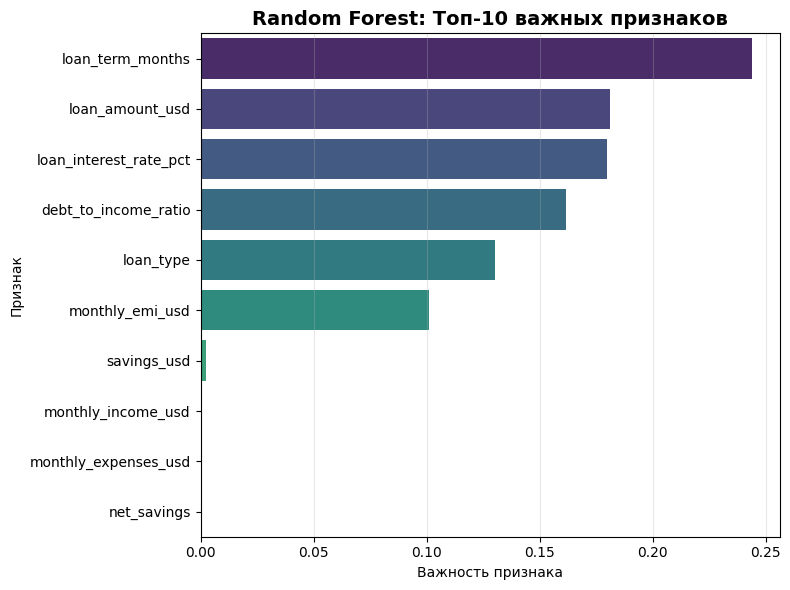

In [27]:
# ===================================================
# 🔍 Анализ потенциальных утечек данных (Data Leakage Check)
# ===================================================
# Проверяем, какие признаки "слишком хороши" — возможно, они содержат утечку будущей информации

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Убедимся, что X содержит только признаки (не включает целевую переменную)
# X уже определён до train_test_split — используем его

# Список признаков
feature_names = X.columns.tolist()

# -----------------------------------------------
# 1. Обучим Random Forest, чтобы оценить важность
# -----------------------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf.fit(X_train, y_train)

# Важность признаков
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("🔝 Топ-10 самых важных признаков по Random Forest:")
display(importance_df.head(10).style.format({'importance': '{:.4f}'}))

# Визуализация
plt.figure(figsize=(8, 6))
top10 = importance_df.head(10)
sns.barplot(data=top10, x='importance', y='feature', palette='viridis')
plt.title('Random Forest: Топ-10 важных признаков', fontsize=14, fontweight='bold')
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


In [30]:
# -----------------------------------------------
# 2. Корреляция признаков с целевой переменной (через point-biserial)
# -----------------------------------------------
from scipy.stats import pointbiserialr

correlations = []
for col in X_train.columns:
    if X_train[col].dtype in ['int64', 'float64']:
        corr, _ = pointbiserialr(y_train, X_train[col])
        correlations.append({'feature': col, 'biserial_corr': corr, 'abs_corr': abs(corr)})

correlation_df = pd.DataFrame(correlations).sort_values('abs_corr', ascending=False)

print("\n\n🔗 Сила связи признаков с целевой переменной (point-biserial correlation):")
display(correlation_df.head(10).style.format({'biserial_corr': '{:+.3f}', 'abs_corr': '{:.3f}'})
                            .background_gradient(cmap='coolwarm', subset=['biserial_corr']))

# -----------------------------------------------
# 3. Чек-лист: какие признаки могут быть утечкой?
# -----------------------------------------------

leakage_check = pd.DataFrame({
    'Признак': correlation_df['feature'],
    'Корреляция с y': correlation_df['biserial_corr'],
    'RF Importance': [importance_df.set_index('feature').loc[f, 'importance'] 
                      if f in importance_df['feature'].values else 0 
                      for f in correlation_df['feature']],
    'Комментарий': [
        '⚠️ EMI по этому кредиту — НЕ ДОЛЖЕН быть доступен!' if 'emi' in f.lower() else
        '⚠️ Содержит долг по кредиту — может быть утечкой' if 'debt' in f.lower() else
        '⚠️ Отношение сбережений к доходу — может быть расчётным' if 'savings_to_income' in f else
        '⚠️ Процентная ставка — может зависеть от решения' if 'interest' in f.lower() else
        '✅ Обычно доступен' for f in correlation_df['feature']
    ]
})

# Выделяем красным подозрительные
def highlight_risk(row):
    return ['background-color: pink' if '⚠️' in row['Комментарий'] else '' for _ in row]

print("\n\n📌 Ручная проверка на утечки — заполни колонку 'Доступен ДО?'")
display(leakage_check.style.format({
    'Корреляция с y': '{:+.3f}',
    'RF Importance': '{:.4f}'
}).apply(highlight_risk, axis=1))



🔗 Сила связи признаков с целевой переменной (point-biserial correlation):


,feature,biserial_corr,abs_corr
7,loan_type,-0.864,0.864
11,loan_interest_rate_pct,+0.855,0.855
8,loan_amount_usd,+0.801,0.801
9,loan_term_months,+0.684,0.684
10,monthly_emi_usd,+0.582,0.582
12,debt_to_income_ratio,+0.388,0.388
6,savings_usd,+0.117,0.117
14,savings_to_income_ratio,+0.007,0.007
13,credit_score,+0.007,0.007
16,net_savings,+0.004,0.004




📌 Ручная проверка на утечки — заполни колонку 'Доступен ДО?'


,Признак,Корреляция с y,RF Importance,Комментарий
7,loan_type,-0.864,0.1302,✅ Обычно доступен
11,loan_interest_rate_pct,+0.855,0.1798,⚠️ Процентная ставка — может зависеть от решения
8,loan_amount_usd,+0.801,0.1811,✅ Обычно доступен
9,loan_term_months,+0.684,0.2441,✅ Обычно доступен
10,monthly_emi_usd,+0.582,0.1009,⚠️ EMI по этому кредиту — НЕ ДОЛЖЕН быть доступен!
12,debt_to_income_ratio,+0.388,0.1615,⚠️ Содержит долг по кредиту — может быть утечкой
6,savings_usd,+0.117,0.0022,✅ Обычно доступен
14,savings_to_income_ratio,+0.007,0.0000,⚠️ Отношение сбережений к доходу — может быть расчётным
13,credit_score,+0.007,0.0000,✅ Обычно доступен
16,net_savings,+0.004,0.0000,✅ Обычно доступен


In [48]:

from sklearn.metrics import roc_auc_score

print("Признаки, которые почти идеально предсказывают y:")
for col in X_clean.columns:
    try:
        auc = roc_auc_score(y, X_clean[col])
        if auc > 0.95 or auc < 0.05:
            print(f"  {col}: ROC-AUC = {abs(auc - 0.5)*2 + 0.5:.3f}")
    except:
        continue

Признаки, которые почти идеально предсказывают y:
  loan_type: ROC-AUC = 1.500
  loan_amount_usd: ROC-AUC = 1.500
  loan_term_months: ROC-AUC = 1.500


In [55]:
# Список признаков, которые, скорее всего, НЕ должны быть доступны ДО решения о кредите

leakage_features = [
    'loan_interest_rate_pct',        # ❌ Устанавливается ПОСЛЕ оценки риска → утечка
    'monthly_emi_usd',               # ❌ Рассчитывается от суммы, срока и ставки → утечка
    'debt_to_income_ratio',          # ❌ Если включает долг по ЭТОМУ кредиту → утечка
    'savings_to_income_ratio',
    'loan_type',
    'credit_score',
    'savings_usd',
    
]

# Удаляем из X
X_clean = X.drop(columns=leakage_features, errors='ignore')  # errors='ignore' — на случай, если какого-то нет

print("Удалены признаки-утечки:")
print(leakage_features)
print(f"Осталось признаков: {X_clean.shape[1]}")

Удалены признаки-утечки:
['loan_interest_rate_pct', 'monthly_emi_usd', 'debt_to_income_ratio', 'savings_to_income_ratio', 'loan_type', 'credit_score', 'savings_usd']
Осталось признаков: 10


In [56]:
from sklearn.model_selection import train_test_split

X_train_clean, X_test_clean, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42, stratify=y
)

print("Размеры новых выборок:")
print(f"X_train: {X_train_clean.shape}, X_test: {X_test_clean.shape}")

Размеры новых выборок:
X_train: (25939, 10), X_test: (6485, 10)


In [57]:

models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100),
}

# Храним результаты
results_clean = {}

print("🔁 Перетренировка моделей на очищенных данных (без утечек)...\n")
print("="*80)

for name, model in models.items():

    cv_scores = cross_val_score(model, X_train_clean, y_train, cv=5, scoring='roc_auc')
    
    # Обучение и предсказание
    model.fit(X_train_clean, y_train)
    y_pred = model.predict(X_test_clean)
    y_proba = model.predict_proba(X_test_clean)[:, 1]
    
    # Сохраняем метрики
    results_clean[name] = {
        'CV ROC-AUC': cv_scores.mean(),
        'CV Std': cv_scores.std(),
        'Test ROC-AUC': roc_auc_score(y_test, y_proba),
        'F1-Score (Class 1)': classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']
    }
    
    # Вывод
    print(f"\n{name}:")
    print(f"  CV ROC-AUC:     {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
    print(f"  Test ROC-AUC:   {results_clean[name]['Test ROC-AUC']:.3f}")
    print(f"  F1-Score (1):   {results_clean[name]['F1-Score (Class 1)']:.3f}")

🔁 Перетренировка моделей на очищенных данных (без утечек)...


Logistic Regression:
  CV ROC-AUC:     1.000 ± 0.000
  Test ROC-AUC:   1.000
  F1-Score (1):   0.995

Random Forest:
  CV ROC-AUC:     1.000 ± 0.000
  Test ROC-AUC:   1.000
  F1-Score (1):   1.000
